<a href="https://colab.research.google.com/github/fonslucens/test_deeplearning/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# y_train[4], x_train[4]

In [4]:
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

3 <class 'numpy.uint8'>


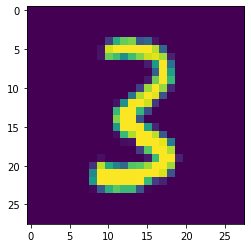

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [6]:
x_train = x_train.reshape(-1, 28*28)
x_train.shape

(60000, 784)

In [7]:
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [8]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [9]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,)))   # input layer
model.add(tf.keras.layers.Dense(64, activation='relu'))   # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu'))   # hidden layer

# 3이상 --> softmax, binary --> sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax'))   # output layer

# regression --> loss : mse
# binary classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy(sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [12]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2703 - acc: 0.8088 - val_loss: 0.5692 - val_acc: 0.8774
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4598 - acc: 0.8942 - val_loss: 0.4550 - val_acc: 0.8976
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3538 - acc: 0.9133 - val_loss: 0.3881 - val_acc: 0.9116
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2923 - acc: 0.9255 - val_loss: 0.3058 - val_acc: 0.9269
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2618 - acc: 0.9330 - val_loss: 0.2913 - val_acc: 0.9299
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2223 - acc: 0.9396 - val_loss: 0.2480 - val_acc: 0.9388
Epoch 7/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1881 - acc: 0.9480 - val_loss: 0.2414 - val_acc: 0.9432
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [13]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

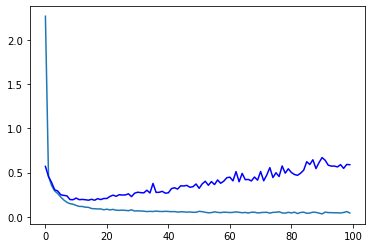

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

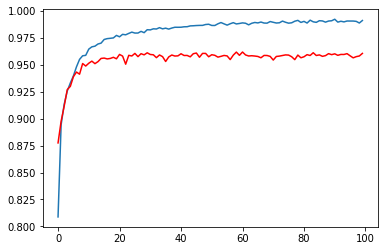

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [20]:
# x_test[30]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  21, 113, 193, 254, 253, 25

In [24]:
import numpy as np
# np.set_printoptions(precision=8)

pred = model.predict(x_test[30:31])
pred, np.argmax(pred)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.1816895e-28,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [33]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [34]:
model.save('./model_save01.h5')

In [36]:
model_load = tf.keras.models.load_model('./model_save01.h5')
model_load

In [37]:
load_pred = model_load.predict(x_test[30:31])
load_pred, np.argmax(load_pred)

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.1816895e-28,
         0.0000000e+00, 0.0000000e+00]], dtype=float32), 3)